In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 3]


In [2]:
def displayImage(img):   #this is a function
    plt.imshow(img, cmap='gray')
    plt.show()
    
def displayImages(img1,img2):
    fig= plt.figure(figsize=(10,20))
    fig.add_subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')
    plt.title("First")
    
    fig.add_subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.title("Second")
    plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


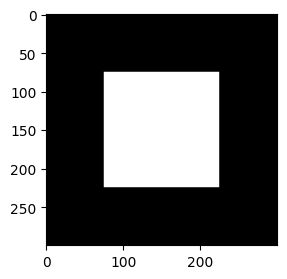

In [3]:
arr = np.zeros(90000)
arr = arr.reshape(300,300)
print(arr)

arr[75:225,75:225]=255
print(arr)

displayImage(arr)

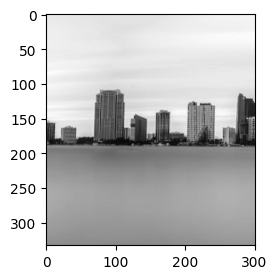

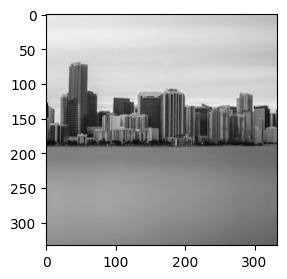

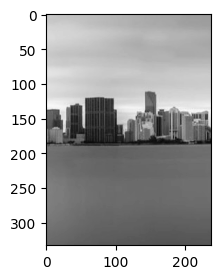

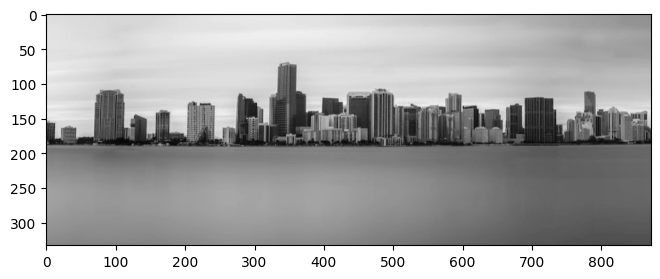

In [4]:
img1 = cv2.imread("./assets/concat1.jpg", 0)
img2 = cv2.imread("./assets/concat2.jpg", 0)
img3 = cv2.imread("./assets/concat3.jpg", 0)
displayImage(img1)
displayImage(img2)
displayImage(img3)

img_list=[img1,img2,img3]

concat_img=cv2.hconcat(img_list)
displayImage(concat_img)




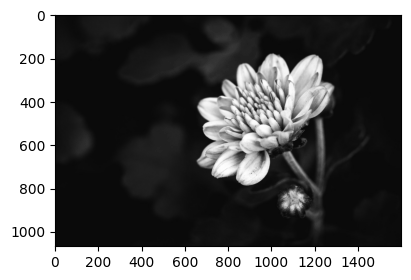

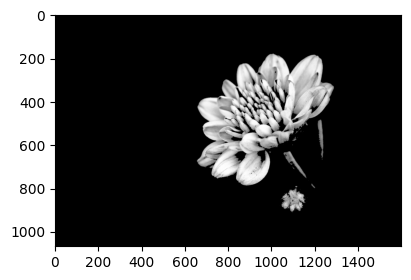

In [5]:
image=img1 = cv2.imread("./assets/threshold.jpg", 0)
displayImage(image)

image[image<100] = 0
displayImage(image)

#ret,thresh1 = cv2.threshold(image,100,255,cv2.THRESH_TOZERO)
#displayImage(thresh1)

In [7]:


towers = cv2.imread('./assets/skyline.jpg', 0)

point1 = None
point2 = None
segment = None
new = None
def recConstruct(event,x,y,flags,param):
    global point1, point2, segment,new
    
    if event == cv2.EVENT_LBUTTONDOWN:  #if the left button of the mouse is pressed
        if point1 is None: #to make sure that the first left click is the only point stored in point1 and after storing this point in point1 no other point will be stored in point1
            point1 = (x,y)
            print(f"Point 1: {point1}")
                                                        
        elif point2 is None:
            point2 = (x,y)        #the same for point2 except it stores the second click
            print(f"Point 2: {point2}")
            segment=1

    if point1 is not None and point2 is not None:
        new=cv2.rectangle(towers,point1,point2,(0,0,255),10)                     
            
            

        
# Creating a window to add the mouse callback to

cv2.namedWindow('Tower')
cv2.setMouseCallback('Tower',recConstruct)

while(1):
    cv2.imshow('Tower',towers)
    if segment is not None:
        cv2.imshow('rectangle image', new)
    key=cv2.waitKey(1) #the waitKey function can return the value of a pressed key in addition to wait number of milliseconds
    if key == 27:
        break
cv2.destroyAllWindows()


Point 1: (389, 200)
Point 2: (926, 558)


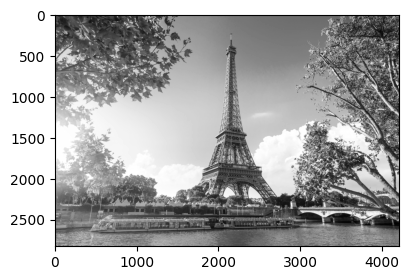

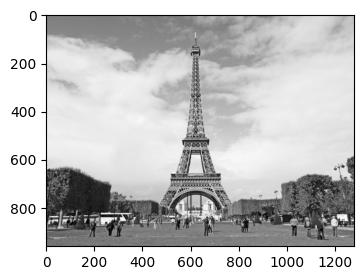

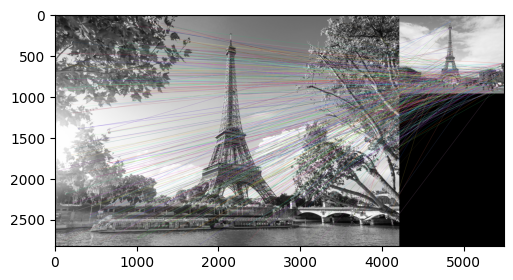

(<matplotlib.image.AxesImage at 0x19933dbd290>, None)

In [12]:
fig1 = cv2.imread('./assets/feature1.jpeg', 0)
fig2 = cv2.imread('./assets/feature2.jpeg', 0)
displayImage(fig1)
displayImage(fig2)


# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(fig1,None)
kp2, des2 = sift.detectAndCompute(fig2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
 if m.distance < 0.75*n.distance:
     good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(fig1,kp1,fig2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()
